# Identify working and data directory and site ID.
* The working directory is the root directory of the github.
* The data directory points to the google drive folder where the larger data files are stored.
* For the moment the site ID if the four-digit NEON site ID.

In [1]:
working<-"~/neon_suna"
site_id<-"BARC"
#data<-paste("~/gdrive/SUNA_Data/SUNA_NEON/",site_id,"/2019",sep="")
data<-"/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/BARC_2019"

# Initialize required libraries, functions and formatting utilities.

In [2]:
library(dplyr)
library(streamMetabolizer)
library(splitstackshape)
library(ggplot2)
library(lubridate)
library(reshape2)
library(neonUtilities)
library(progress)
library(patchwork)
library(doBy)
library(stringr)
#library(box)

theme_ts_space<-theme_grey() +
		theme(
#		panel.grid.major = element_blank(),
#		panel.grid.minor = element_blank(),
		panel.background = element_rect(fill="white", colour="black", size=2),
#		legend.key       = element_blank(),
#		legend.text      = element_text(size=20.5),
#		legend.text      = element_blank(),
#		legend.title     = element_text(size=20.5),
		axis.text.x = element_text(size=22,colour="black",hjust=1,angle=45),
		axis.text.y = element_text(size=22,colour="black",vjust=.3),
		axis.title.x = element_text(size=22),
		axis.title.y = element_text(size=22,vjust=-1),
#		plot.title = element_text(hjust = 0.5,size=22,face="bold"),		
#		legend.position  = "left",
		legend.position  = "none",
		plot.margin = unit(c(1,1,1,1), "cm"),
		panel.border = element_rect(colour = "black", fill=NA, size=2)
		)






Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


USGS Active Research Package:
https://owi.usgs.gov/R/packages.html#research

This package was developed for research purposes. We used it for our
own applications and welcome flexible, resilient users who can help us
test and improve the package. Please give us feedback at
https://github.com/USGS-R/streamMetabolizer/issues/new.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by




# Setting up the workspace
In the cell below indicate the site that will be analyzed here according to its NEON 4-letter code. A list of files for that site is then placed in the vector "sunas".

If you downloaded the repo into your home director, which is found by going to "~/", then you don"t have to change the box path. FYI: Box is a new package for R that allows you to define a set of functions without creating a new package.

In [3]:

#setwd(paste("~/gdrive/SUNA_data/SUNA_NEON/",site_id,sep=""))
#sunas<-list.files(pattern="*.csv")
#getwd()
#options(box.path = "~/neon_suna/box/")
#box::use(plots)

setwd(data)
sunas<-list.files(pattern="*.CSV")

#suna_cal<-readRDS("/Users/jhosen/gdrive/fdom/SUNA Calibration pdfs/suna_cal_comb.rds")
suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA Calibration pdfs/suna_0839_20200312.csv")
suna_cal_t<-as.data.frame(t(suna_cal))
names(suna_cal_t)<-suna_cal_t[1,]

# Data import and processing loop.
This step loads each data file, formats the data for use, and concatenates files from an individual site.

This step could take a while.

In [41]:
cal

[1] "SNA0826U"

In [43]:
options(warn=-1)
compiled_suna<-data.frame()
sunas_length<-length(sunas)
for(i in 1:sunas_length){
#i<-1
print(i)


suna_calid<-read.csv(paste(sunas[i]),skip=0,header=FALSE)
cal<-str_extract(suna_calid,"[SNA]{3}[0-9]{4}[a-zA-Z]{1}")
cal<-cal[!is.na(cal)]
    
    
suna<-read.csv(paste(sunas[i]),skip=30,header=FALSE)

if(cal!="SNA0826L" & cal!="SNA0826M" & cal!="SNA0826N"){suna_cal<-read.csv(paste("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/BARC_2019/cal_files/",cal,"_abbr.csv",sep=""))}else{
    suna_cal<-read.csv("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/BARC_2019/cal_files/SNA0826O_abbr.csv")}



    
    
suna_cal_t<-as.data.frame(t(suna_cal))
names(suna_cal_t)<-suna_cal_t[1,]

#suna_d0<-cSplit(suna,3, ",")
names(suna)<-c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time",suna_cal$wavelength_nm,"sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum")

    
#suna<-subset(suna,a254!=0)

suna<-subset(suna,a254!=0)
    
#year<-substr(suna$date, 1, 4)
if(grepl("D2019",sunas[i])==TRUE){
year<-"2019"
doy<-gsub(".CSV","",gsub("D2019","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}
    
if(grepl("D2020",sunas[i])==TRUE){
year<-"2020"
doy<-gsub(".CSV","",gsub("D2020","",paste(sunas[i]),fixed=TRUE),fixed=TRUE)
}

day<-as.POSIXct(paste(as.Date(as.numeric(doy)-1,origin=paste(year,"-01-01",sep="")),"00:00:00"),tz="UTC")
#suna$day<-as.POSIXct("2019-05-10 00:00:00",tz="UTC")
suna$dtp<-day + (3600*as.numeric(suna$time))
#attr(suna$dtp,"tzone") <- "Etc/GMT+8"

    

offse<-c(t(suna_cal_t[3,]))
suna2<-(suna[,12:267]/suna$int_time)-suna$dark_signal_average
suna_d0_norm<-sweep(suna2,2,FUN="/",offse)
names(suna_d0_norm)<-paste("n_",names(suna_cal_t),sep="")

    

#print("test")
suna_d0_int<-data.frame()
for(j in 1:nrow(suna_d0_norm)){	
#    print(j)
    if(!is.na(suna_d0_norm[j,1])){
	flip<-as.data.frame(t(suna_d0_norm[j,]))
	names(flip)<-c("abs")
	flip$wl_nm<-gsub("n_","",row.names(flip),fixed=TRUE)
	flip_int<-as.data.frame(t(approx(flip$wl_nm,flip$abs,xout=seq(189,394,1),rule=2)$y))
	names(flip_int)<-paste("interp_",seq(189,394,1),sep="")
	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }else{
        flip_int[1,]<-NA
       	suna_d0_int<-bind_rows(suna_d0_int,flip_int)
    }
}
suna_d<-bind_cols(suna,suna_d0_int)
#suna_d$date<-as.character(suna_d[,c("date")])
#suna_d$time<-as.character(suna_d[,c("time")])
suna_d2<-suna_d %>% mutate_if(is.numeric,as.character)
compiled_suna<-bind_rows(compiled_suna,suna_d2)
}
print("done")
options(warn=0)    
    
    
    


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

# Check Data and Save

In [46]:
#head(compiled_suna)
#grepl("D2020",sunas[240])
#sunas[240]
#length(sunas)
#sunas[240]
#ncol(compiled_suna)
#nrow(compiled_suna)
#names(compiled_suna)<-gsub("inter_time","int_time",names(compiled_suna),fixed=TRUE)
saveRDS(compiled_suna,"/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/BARC_2019/BARC_corrected/SUNA_BARC_20210428_full.rds")
#compiled_suna<-readRDS("/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/BARC_2019/BARC_corrected/SUNA_BARC_20210428_full.rds")


# Extracting the interpolated columns

In [47]:
compiled_suna$cal<-"suna_0839"

suna_interp<-compiled_suna[,grepl("^inter",names(compiled_suna))] %>% mutate_if(is.character, ~as.numeric(.))
#head(suna_interp)

other_suna<-compiled_suna[,c("suna_id","date","time","nitrate","nitrate_mgl","a254","a350","bromide_trace","spec_average_dark","dark_signal_average","int_time","sensor_temp","spec_temp","lamp_temp","lamp_time","rel_hum","main_volt","lamp_volt","int_volt","main_current","fit_aux_1","fit_aux_2","fit_base_1","fit_base_2","fit_RMSE","CTD_Time","CTD_Salinity","CTD_Temp","CTD_Pressure","checksum","cal","dtp")]

suna_cols<-bind_cols(other_suna,suna_interp)
suna_cols$a254<-as.numeric(suna_cols$a254)
suna_cols$a350<-as.numeric(suna_cols$a350)
suna_cols$nitrate<-as.numeric(suna_cols$nitrate)
suna_cols$nitrate_mgl<-as.numeric(suna_cols$nitrate_mgl)
suna_cols$sensor_temp<-as.numeric(suna_cols$sensor_temp)


In [ ]:
range(suna_cols$a254)
range(suna_cols$interp_254)
suna_cols$interp_254
names(suna_cols)

In [51]:
suna_cols<-subset(suna_cols,a350<10 & a254<10)
a350_mod<-lm(a350~log10(interp_350)+I(log10(interp_350)^2)+I(log10(interp_350)^3),suna_cols)
a254_mod<-lm(a254~log10(interp_254+0.6)+I(log10(interp_254+0.6)^2)+I(log10(interp_254+0.6)^3),suna_cols)



cor_cols<-grep("^interp_",names(suna_cols))



Call:
lm(formula = a254 ~ log10(interp_254 + 0.6) + I(log10(interp_254 + 
    0.6)^2) + I(log10(interp_254 + 0.6)^3), data = suna_cols)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58486 -0.00306 -0.00098  0.00118  0.54078 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.328283   0.001973  166.39   <2e-16 ***
log10(interp_254 + 0.6)      -1.780906   0.021737  -81.93   <2e-16 ***
I(log10(interp_254 + 0.6)^2)  1.273402   0.079882   15.94   <2e-16 ***
I(log10(interp_254 + 0.6)^3) -1.135148   0.085020  -13.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02567 on 347955 degrees of freedom
Multiple R-squared:  0.9835,	Adjusted R-squared:  0.9835 
F-statistic: 6.906e+06 on 3 and 347955 DF,  p-value: < 2.2e-16


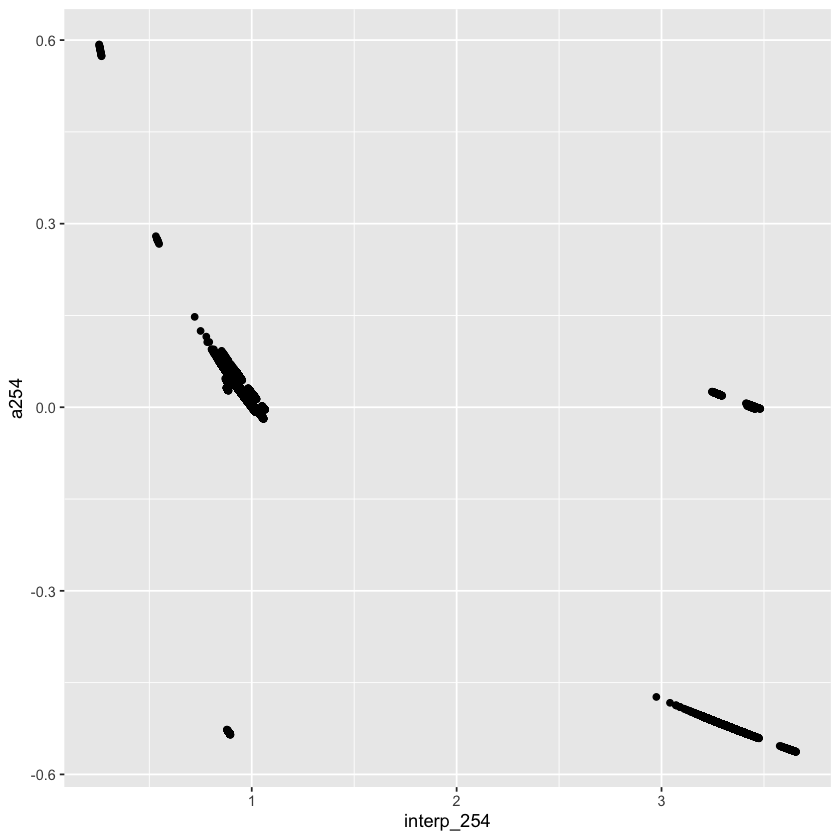

In [52]:
ggplot(suna_cols,aes(interp_254,a254))+geom_point()

summary(a254_mod)

In [53]:
options(warn=1)


#compiled_suna2[,c(cor_cols)]<-compiled_suna2[,c(cor_cols)] %>% mutate_if(is.character,as.numeric)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_350=suna_cols[,cor_cols[i]],interp_254=suna_cols[,cor_cols[i]])
	a350_pred<-predict(a350_mod,newdata=prepdata)
	a254_pred<-predict(a254_mod,newdata=prepdata)
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c350",sep=""))]<-a350_pred
	suna_cols[,c(paste(names(suna_cols)[cor_cols[i]],"_c254",sep=""))]<-a254_pred
}

options(warn=0)

Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in structure(x, class = unique(c("AsIs", oldClass(x)))):
“NaNs produced”
Warning message in eval(predvars, data, 

# Reducing data down to 15 minutes intervals.
We want to average down each burst from the SUNA to a single value and mac sure that these values are snapped to 15 minutes intervals (e.g., rather than round up or down to 14 or 16).

In [81]:
head(suna_cols)

[1] 416901

In [54]:
#rm(compiled_suna)
#rm(compiled_suna_1)
#rm(compiled_suna_2)

suna_cols$dtpr<-lubridate::round_date(suna_cols$dtp, "15 minutes")
suna_red<-summaryBy(.~dtpr,suna_cols,FUN=c(mean))



In [ ]:
#unique(as.Date(suna_red$dtpr))

# Downloading turbidity time series data from NEON.
Data product DP1.20288.001 for general water quality sonde data.

In [55]:
#BARC_wqs<-loadByProduct(dpID="DP1.20288.001",site="BARC",check.size=F)
#saveRDS(BARC_wqs,paste(data,"/BARC_wqs.rds",sep=""))
BARC_wqs<-readRDS(paste(data,"/BARC_wqs.rds",sep=""))


Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table waq_instantaneous
Stacking table ais_maintenance
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 2 metadata tables!
Stacking took 5.370483 secs


In [56]:
BARC_wqsd<-BARC_wqs$waq_instantaneous
BARC_wqsd$dtp<-BARC_wqsd$startDateTime
BARC_wqk<-subset(BARC_wqsd[,c("siteID","dtp","specificConductance","dissolvedOxygen","pH","chlorophyll","turbidity","fDOM")],!is.na(BARC_wqsd$specificConductance))
#str(BARC_wqk)

BARC_wqk$dtpr<-lubridate::round_date(BARC_wqk$dtp, "15 minutes")
BARC_wq_red<-summaryBy(.~dtpr,BARC_wqk,FUN=c(mean))
str(BARC_wq_red)

'data.frame':	95969 obs. of  7 variables:
 $ dtpr                    : POSIXct, format: "2017-10-20 14:45:00" "2017-10-20 15:00:00" ...
 $ specificConductance.mean: num  1613 1614 1611 1613 1612 ...
 $ dissolvedOxygen.mean    : num  5.63 5.67 5.68 5.7 5.7 ...
 $ pH.mean                 : num  4.47 4.53 4.65 4.54 4.52 ...
 $ chlorophyll.mean        : num  1.06 1.017 0.977 1.013 1.02 ...
 $ turbidity.mean          : num  -7.37 -7.32 -7.33 -7.34 -7.32 ...
 $ fDOM.mean               : num  NA NA NA NA NA NA NA NA NA NA ...


In [57]:
BARC_sw<-merge(suna_red,BARC_wq_red,by="dtpr",all.x=TRUE)


In [58]:
saveRDS(BARC_sw,paste(data,"/BARC_SUNA_wq.rds",sep=""))

# import and merge NEON water quality grab sample data.

### Downloading grab sample data and saving as rds file in data folder.

In [60]:


library(zoo)
BARC_wqg<-loadByProduct(dpID="DP1.20093.001",site="BARC",check.size=F)
saveRDS(BARC_wqg,paste(data,"/BARC_wqg.rds",sep=""))
BARC_wqg<-readRDS(paste(data,"/BARC_wqg.rds",sep=""))



Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table swc_domainLabData
Stacking table swc_externalLabDataByAnalyte
Stacking table swc_fieldData
Stacking table swc_fieldSuperParent
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 4 data tables and 3 metadata tables!
Stacking took 6.218399 secs


### extracting lab analysis data

In [61]:
BARC_wqg_d<-as.data.frame(BARC_wqg$swc_externalLabDataByAnalyte)

names(BARC_wqg_d)

uv_abs<-subset(BARC_wqg_d,analyte=="UV Absorbance (250 nm)"|analyte=="UV Absorbance (280 nm)")
date_cast<-dcast(uv_abs[,c("analyte","collectDate","analyteConcentration")],collectDate~analyte,value.var="analyteConcentration",mean)
date_cast$dtpr<-lubridate::round_date(date_cast$collectDate, "15 minutes")

names(date_cast)

[1] "uid"                  "domainID"             "siteID"              
 [4] "namedLocation"        "sampleID"             "sampleCode"          
 [7] "startDate"            "collectDate"          "laboratoryName"      
[10] "analyte"              "analyteConcentration" "analyteUnits"        
[13] "coolerTemp"           "remarks"              "shipmentWarmQF"      
[16] "externalLabDataQF"    "sampleCondition"      "publicationDate"     
[19] "release"

[1] "collectDate"            "UV Absorbance (250 nm)" "UV Absorbance (280 nm)"
[4] "dtpr"

In [68]:

suna_grab<-merge(BARC_sw,date_cast,by="dtpr")

#temp_nitrate_zoo<-zoo(nitrate$nitrate_umL,nitrate$dtp)
#temp_n<-na.approx(temp_nitrate_zoo,xout=suna_red$dtp,na.rm=FALSE)
#suna_grab[,c("UV Absorbance (250 nm)")]
names(suna_grab)<-gsub("UV Absorbance (250 nm)","uva_250_lab",names(suna_grab),fixed=TRUE)
names(suna_grab)<-gsub("UV Absorbance (280 nm)","uva_280_lab",names(suna_grab),fixed=TRUE)



In [63]:
#subset(suna_red,as.Date(dtpr)==as.Date("2019-03-04"))
#as.Date(date_cast$dtpr)
#unique(as.Date(suna_red$dtpr))

suna_grab


dtpr,nitrate.mean,nitrate_mgl.mean,a254.mean,a350.mean,sensor_temp.mean,interp_189.mean,interp_190.mean,interp_191.mean,interp_192.mean,⋯,interp_394_c254.mean,specificConductance.mean,dissolvedOxygen.mean,pH.mean,chlorophyll.mean,turbidity.mean,fDOM.mean,collectDate,uva_250_lab,uva_280_lab
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2019-02-05 17:00:00,1.2145,0.017010,0.035480,0.004075,16.390,-4.800000,7.4907774,2.26675822,0.94105653,⋯,0.03012266,25.37667,9.130000,5.230000,0.4800000,-1.6966667,7.380000,2019-02-05 16:57:00,0.03660000,0.0270
2019-03-05 16:15:00,2.2370,0.031340,0.051905,0.023640,20.125,-0.240000,1.7806871,0.93736263,0.99838830,⋯,0.02631228,25.78000,7.536667,5.333333,0.6733333,0.8500000,9.126667,2019-03-05 16:11:00,0.11820000,0.0828
2019-04-11 14:45:00,1.1450,0.016045,0.041900,0.024285,24.320,-0.432000,-0.2533252,0.19946950,0.69825835,⋯,0.02561338,26.04333,8.290000,5.233333,0.3500000,0.6533333,5.340000,2019-04-11 14:42:00,0.03010000,0.0228
2019-05-08 14:30:00,1.0315,0.014470,0.054325,0.027355,27.515,0.552000,0.5266905,0.94350133,0.11672118,⋯,0.02437210,26.22667,7.100000,5.333333,0.2500000,0.5933333,5.090000,2019-05-08 14:32:00,0.02640000,0.0176
2019-06-11 15:00:00,11.4070,0.159770,-0.524645,-0.510185,29.800,0.241769,0.1204136,0.08685783,0.03479594,⋯,-0.51422443,27.01667,5.386667,5.053333,0.6600000,0.6200000,8.356667,2019-06-11 14:56:00,0.03316667,0.0242
2019-07-08 14:00:00,2.1260,0.029780,0.031950,0.019385,30.875,0.804878,0.9963446,-5.48175818,4.61912057,⋯,0.02086089,27.23667,4.463333,5.426667,0.9766667,0.6800000,8.966667,2019-07-08 14:02:00,0.02300000,0.0070


# Exploring turbidity corrections

In [69]:
#names(suna_grab)
#suna_grab<-subset(suna_grab,!is.na(uva_250_lab)&!is.na(uva_280_lab)&uva_250_lab<2)
suna_grab<-subset(suna_grab,!is.na(uva_250_lab)|!is.na(uva_280_lab))
suna_grab$turbidity.mean[suna_grab$turbidity.mean<=0]<-1
suna_grab[,c("dtpr","a254.mean","uva_250_lab","uva_280_lab","interp_250_c254.mean","turbidity.mean")]

suna_grab$interp_250_log<-log10(suna_grab$interp_250_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)
nrow(suna_grab)
suna_grab$uva_250_lab
#suna_grab$interp_250_tcorr<-predict(lm(uva_250_lab~interp_250_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_250_tcorr_log<-predict(lm(uva_250_lab~interp_250_log*turbidity.mean,suna_grab))
#suna_grab$interp_250_tcorr_log_turb<-predict(lm(uva_250_lab~interp_250_log*turb_log,suna_grab))


saveRDS(suna_grab,paste(getwd(),"/BARC_SUNA_grab.rds",sep=""))

,dtpr,a254.mean,uva_250_lab,uva_280_lab,interp_250_c254.mean,turbidity.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-02-05 17:00:00,0.035480,0.03660000,0.0270,0.03428535,1.0000000
2,2019-03-05 16:15:00,0.051905,0.11820000,0.0828,0.04856639,0.8500000
3,2019-04-11 14:45:00,0.041900,0.03010000,0.0228,0.04510149,0.6533333
4,2019-05-08 14:30:00,0.054325,0.02640000,0.0176,0.05662710,0.5933333
5,2019-06-11 15:00:00,-0.524645,0.03316667,0.0242,-0.51464672,0.6200000
6,2019-07-08 14:00:00,0.031950,0.02300000,0.0070,0.03542547,0.6800000


Warning message in eval(expr, envir, enclos):
“NaNs produced”


[1] 6

[1] 0.03660000 0.11820000 0.03010000 0.02640000 0.03316667 0.02300000

[1] "/Users/jhosen/gdrive/SUNA_Data/SUNA_NEON/SUGG_2019"


Call:
lm(formula = uva_250_lab ~ a254.mean * turb_log, data = suna_grab)

Residuals:
         1          2          3          4          6 
-0.0004033  0.0007785 -0.0050513  0.0016156  0.0030605 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -0.22734    0.02777  -8.187   0.0774 .
a254.mean           7.45060    0.67425  11.050   0.0575 .
turb_log           -1.09524    0.17584  -6.229   0.1013  
a254.mean:turb_log 32.55386    4.07394   7.991   0.0793 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006186 on 1 degrees of freedom
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9763 
F-statistic: 55.98 on 3 and 1 DF,  p-value: 0.09786


,uva_250_lab,interp_250_c254.mean
,<dbl>,<dbl>
1,0.0366,0.03428535
2,0.1182,0.04856639
3,0.0301,0.04510149
4,0.0264,0.05662710
6,0.0230,0.03542547


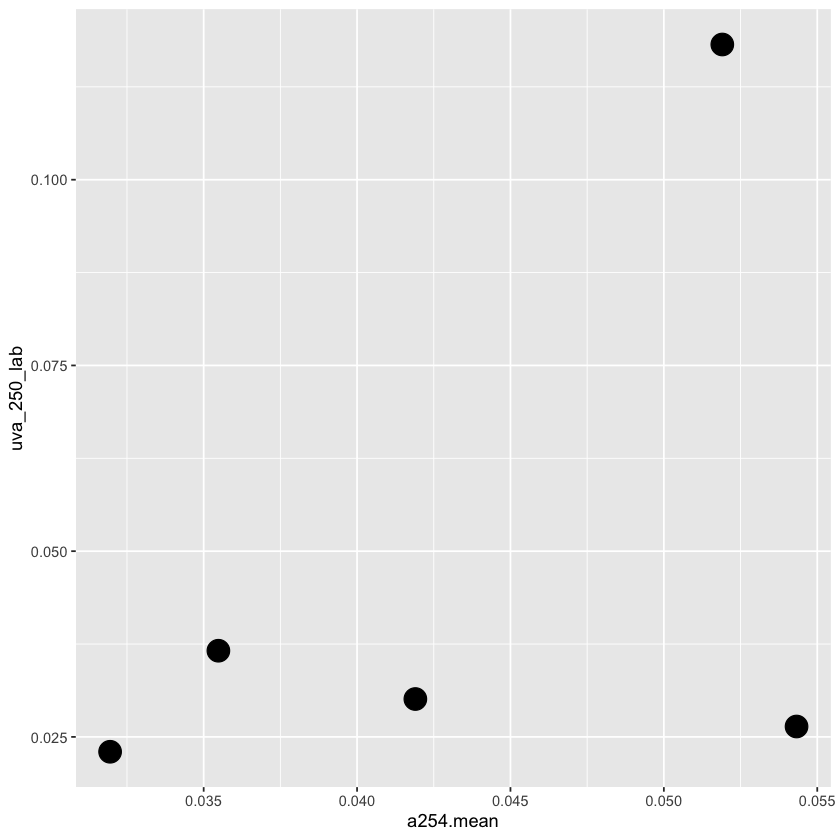

In [72]:
suna_grab<-subset(suna_grab,a254.mean<7 & a254.mean>0 & !is.na(turbidity.mean))

suna_grab$interp_250_log<-log10(suna_grab$interp_250_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)

#suna_grab$turb_log
summary(lm(uva_250_lab~a254.mean*turb_log,suna_grab))
#summary(lm(uva_250_lab~interp_250_c254.mean*turb_log,suna_grab))

#suna_grab$interp_250_tcorr<-predict(lm(uva_250_lab~interp_250_c254.mean*turbidity.mean,suna_grab))
#suna_grab$interp_250_tcorr_log<-predict(lm(uva_250_lab~interp_250_log*turbidity.mean,suna_grab))
#suna_grab$interp_250_tcorr_log_turb<-predict(lm(uva_250_lab~interp_250_log*turb_log,suna_grab))

suna_grab[,c("uva_250_lab","interp_250_c254.mean")]
ggplot(suna_grab,aes(a254.mean,uva_250_lab))+
#theme_ts_space+
#xlab("\nUV Absorbance at 250 nm (Laboratory)")+
#ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)



In [50]:
suna_grab$interp_250_log<-log10(suna_grab$interp_250_c254.mean)
suna_grab$turb_log<-log10(suna_grab$turbidity.mean)


summary(lm(uva_250_lab~interp_250_log*turb_log,suna_grab))
summary(lm(uva_250_lab~interp_250_c254.mean*turb_log,suna_grab))

suna_grab$interp_250_tcorr<-predict(lm(uva_250_lab~interp_250_c254.mean*turbidity.mean,suna_grab))
suna_grab$interp_250_tcorr_log<-predict(lm(uva_250_lab~interp_250_log*turbidity.mean,suna_grab))
suna_grab$interp_250_tcorr_log_turb<-predict(lm(uva_250_lab~interp_250_log*turb_log,suna_grab))


ggplot(suna_grab,aes(uva_250_lab,interp_250_c254.mean,color=pH.mean))+
theme_ts_space+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Uncorrected)\n")+
geom_point(size=6)

ggsave("~/neon_suna/plots/BARC_250_uncorrected.pdf",width = 20, height = 20, units = "cm")



ggplot(suna_grab,aes(uva_250_lab,interp_250_tcorr_log,color=pH.mean))+
theme_ts_space+
geom_smooth(method="lm",color="grey20")+
xlab("\nUV Absorbance at 250 nm (Laboratory)")+
ylab("UV Absorbance at 250 nm (SUNA Corrected)\n")+
geom_point(size=6)+
ggtitle("Turbidity Corrected")

ggsave("~/neon_suna/plots/BARC_250_corrected.pdf",width = 20, height = 20, units = "cm")




#summary(lm(uva_250_lab~interp_250_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c350.mean*turbidity.mean+sensor_temp.mean,suna_grab))
#summary(lm(uva_280_lab~interp_280_c254.mean*turbidity.mean+sensor_temp.mean,suna_grab))


Call:
lm(formula = uva_250_lab ~ interp_250_log * turb_log, data = suna_grab)

Residuals:
       2        3        4        5        7        8 
-1.65453  0.71119  0.65083 -0.37406  0.69600 -0.02944 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                28.13      61.47   0.458    0.692
interp_250_log            -44.20     103.31  -0.428    0.710
turb_log                 -204.80     489.11  -0.419    0.716
interp_250_log:turb_log   342.87     823.89   0.416    0.718

Residual standard error: 1.465 on 2 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1848,	Adjusted R-squared:  -1.038 
F-statistic: 0.1511 on 3 and 2 DF,  p-value: 0.9206



Call:
lm(formula = uva_250_lab ~ interp_250_c254.mean * turb_log, data = suna_grab)

Residuals:
       2        3        4        5        7        8 
-1.65010  0.71034  0.65467 -0.37487  0.69899 -0.03903 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                     21.134     44.875   0.471    0.684
interp_250_c254.mean            -4.907     11.404  -0.430    0.709
turb_log                      -149.261    357.288  -0.418    0.717
interp_250_c254.mean:turb_log   37.723     91.069   0.414    0.719

Residual standard error: 1.464 on 2 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1858,	Adjusted R-squared:  -1.035 
F-statistic: 0.1522 on 3 and 2 DF,  p-value: 0.9199


ERROR: Error in `$<-.data.frame`(`*tmp*`, interp_250_tcorr, value = c(`2` = 1.47227677938903, : replacement has 6 rows, data has 8


In [ ]:
names(BARC_sw)

# Apply turbidity correction based on lab samples.

In [ ]:
cor_cols<-grep("^interp_",names(BARC_sw))

uva_250_turb_lm<-lm(uva_250_lab~interp_250_log*turbidity.mean,suna_grab)

for(i in 1:length(cor_cols)){
	prepdata<-data.frame(interp_250_log=log10(BARC_sw[,cor_cols[i]]),turbidity.mean=BARC_sw$turbidity.mean)
	turb_cor_pred<-predict(uva_250_turb_lm,newdata=prepdata)
	BARC_sw[,c(paste(names(BARC_sw)[cor_cols[i]],"_turb",sep=""))]<-turb_cor_pred
}



In [ ]:
head(BARC_sw)

In [ ]:
BARC_swt_0<-BARC_sw[,grep("*_turb$",names(BARC_sw))]
BARC_swt<-bind_cols(BARC_sw[,c("dtpr","nitrate.mean","nitrate_mgl.mean","a254.mean","a350.mean","sensor_temp.mean","specificConductance.mean","dissolvedOxygen.mean","pH.mean","chlorophyll.mean","turbidity.mean","fDOM.mean")],BARC_swt_0)





# Adding PAR data.

In [ ]:
BARC_par<-loadByProduct(dpID="DP1.20042.001",site="BARC",check.size=F)
saveRDS(BARC_par,paste(getwd(),"/BARC_par.rds",sep=""))
BARC_par<-readRDS(paste(getwd(),"/BARC_par.rds",sep=""))




In [ ]:
#lubridate::round_date(BARC_parts$dtp, "15 minutes")


In [ ]:

BARC_parts<-BARC_par$PARWS_5min
BARC_parts$dtp<-BARC_parts$startDateTime
#str(BARC_wqk)



BARC_parts$dtpr<-lubridate::round_date(BARC_parts$dtp, "15 minutes")
BARC_parts_red<-summaryBy(PARMean~dtpr,BARC_parts,FUN=c(mean))
head(BARC_parts_red)
#str(BARC_wq_red)

BARC_swtpar<-merge(BARC_swt,BARC_parts_red,by="dtpr",all.x=TRUE)


In [ ]:

str(BARC_swtpar$dtpr)

attr(BARC_swtpar$dtpr,"tzone") <- "Etc/GMT+5"

str(BARC_swtpar$dtpr)
BARC_swtpar$date<-as.Date(BARC_swtpar$dtpr,tz="Etc/GMT+5")

BARC_dates<-unique(BARC_swtpar$date)

for(i in 1:length(BARC_dates)){
    
    
}

In [ ]:

#BARCd<-subset(BARC_swtpar,date==as.Date("2019-06-10"))
BARCd<-BARC_swtpar

BARCdk<-BARCd[,grep("*c254.mean_turb$",names(BARCd))]
BARCdk$dtpr<-BARCd$dtpr

BARCdm<-subset(melt(BARCdk,id.vars=c("dtpr")),!is.na(value))
BARCdm$wavelength<-gsub("interp_","",BARCdm$variable,fixed=TRUE)
BARCdm$wavelength<-as.numeric(gsub("_c254.mean_turb","",BARCdm$wavelength,fixed=TRUE))



str(BARCdm)

# Trying some ridge plots to look at wavelength changes over time.
So far not looBARC super great.

In [ ]:
#library(ggridges)
#scales::rescale(height)
#BARCdm$dtprn<-scales::rescale(as.numeric(BARCdm$dtpr))
#BARCdm$abs<-scales::rescale(as.numeric(BARCdm$value))


#ggplot(subset(BARCdm,wavelength>=275&wavelength<=295),aes(x = wavelength, y = dtprn, group=dtprn,height = abs)) +
#  geom_ridgeline(fill="grey80",alpha=0.6)

#ggsave("~/neon_suna/plots/BARCdm_ridge.pdf",width = 20, height = 40, units = "cm")


# Calculating spectral slope 275-295nm on each time step.

In [ ]:
names(BARCd)
names(BARCdm)

In [ ]:
ssm_275_295<-subset(BARCdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()


for(i in 1:length(dtps)){
	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()
}	
	


In [ ]:
ggplot(subset(ssm_275_295,variable=="interp_275_c254.mean_turb"),aes(dtpr,value))+geom_point()


In [ ]:
ssm_275_295<-subset(BARCdm,wavelength>=275&wavelength<=295)
dtps<-unique(ssm_275_295$dtpr)
pb <- progress_bar$new(
	format = "  downloading [:bar] :percent eta: :eta",
	total = length(dtps), clear = FALSE, width= 60)
s275295_comp<-data.frame()



	ssm_now<-subset(ssm_275_295,dtpr==dtps[i])
	
	ssm_now$am1<-ssm_now$value*100*2.3025851
	ssm_now$lnam1<-log(ssm_now$am1)


	if(sum(!is.na(ssm_now$lnam1))>2){
		s275295<-lm(ssm_now$lnam1~ssm_now$wavelength)$coefficients[2]*-1
		}else{s275295<-NA}
		s275295_temp<-data.frame(dtpr=dtps[i],s275295=s275295)
		s275295_comp<-bind_rows(s275295_comp,s275295_temp)
#		pb$tick()


In [ ]:
nrow(s275295_comp)
nrow(BARC_swtpar)
BARC_swtp_ss<-merge(BARC_swtpar,s275295_comp,by="dtpr",all.x=TRUE)
saveRDS(BARC_swtp_ss,paste(data,"BARC_swtp_ss.rds",sep=""))

In [ ]:
sdates<-unique(as.Date(BARC_swtp_ss$dtpr,tz="Etc/GMT+5"))

i<-5
comp_df<-data.frame()
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
BARCday<-subset(BARC_swtp_ss,dtpr>=start & dtpr<=finish)
BARCday<-subset(BARCday,!is.na(PARMean.mean) & !is.na(s275295))
nrow(BARCday)
    BARCday$PAR_roll<-as.numeric(c("NA",rollmean(BARCday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    BARCday$s275295_roll<-as.numeric(c("NA",rollmean(BARCday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    BARC_night<-subset(BARCday,PARMean.mean<200)
    night_s275295<-mean(BARC_night$s275295,na.rm=TRUE)

    
    #BARCday$baseline<-predict(lm(s275295~dtpr,BARC_night),BARCday)
    BARCday$baseline_roll<-predict(lm(s275295_roll~dtpr,BARC_night),BARCday)    
    BARCday$s275295_bs<-BARCday$s275295_roll-BARCday$baseline_roll    
    
    BARC_night_am<-subset(BARC_night,hour(dtpr)<=12)
    night_s275295_am<-mean(BARC_night_am$s275295,na.rm=TRUE)
    
    BARC_night_pm<-subset(BARC_night,hour(dtpr)>12)
    night_s275295_pm<-mean(BARC_night_pm$s275295,na.rm=TRUE)
    
    BARC_day<-subset(BARCday,PARMean.mean>=10)
    day_s275295<-mean(BARC_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(BARC_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(BARC_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,BARC_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,BARC_day)$coef[2]    
    
    BARC_n_am_time<-nrow(BARC_night_am)
    BARC_n_pm_time<-nrow(BARC_night_pm)
    BARC_d_time<-nrow(BARC_day)
    
    temp_df<-data.frame(site="BARC",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,BARC_n_am_time=BARC_n_am_time,BARC_n_pm_time=BARC_n_pm_time,BARC_d_time=BARC_d_time)

# Extracting spectral daily slope ratio discrepancy.

In [ ]:
sdates<-unique(as.Date(BARC_swtp_ss$dtpr,tz="Etc/GMT+5"))

#i<-30
comp_df<-data.frame()
for(i in 1:length(sdates)){
#print(i)
start<-as.POSIXct(paste(sdates[i]-1,"22:00",tz="Etc/GMT+5"))
finish<-as.POSIXct(paste(sdates[i]+1,"03:00",tz="Etc/GMT+5"))
BARCday<-subset(BARC_swtp_ss,dtpr>=start & dtpr<=finish)
BARCday<-subset(BARCday,!is.na(PARMean.mean) & !is.na(s275295))

if(nrow(BARCday)>80){
    BARCday$PAR_roll<-as.numeric(c("NA",rollmean(BARCday$PARMean.mean,k=3,align=c("center"),na.fill=TRUE),"NA"))
    BARCday$s275295_roll<-as.numeric(c("NA",rollmean(BARCday$s275295,k=3,align=c("center"),na.fill=TRUE),"NA"))



    BARC_night<-subset(BARCday,PARMean.mean<200)
    night_s275295<-mean(BARC_night$s275295,na.rm=TRUE)
    
    #BARCday$baseline<-predict(lm(s275295~dtpr,BARC_night),BARCday)
    BARCday$baseline_roll<-predict(lm(s275295_roll~dtpr,BARC_night),BARCday)    
    BARCday$s275295_bs<-BARCday$s275295_roll-BARCday$baseline_roll    
    
    BARC_night_am<-subset(BARC_night,hour(dtpr)<=12)
    night_s275295_am<-mean(BARC_night_am$s275295,na.rm=TRUE)
    
    BARC_night_pm<-subset(BARC_night,hour(dtpr)>12)
    night_s275295_pm<-mean(BARC_night_pm$s275295,na.rm=TRUE)
    
    BARC_day<-subset(BARCday,PARMean.mean>=10)
    day_s275295<-mean(BARC_day$s275295,na.rm=TRUE)

    day_s275295_base_sum<-sum(BARC_day$s275295_bs,na.rm=TRUE)
    day_PAR_roll_base_sum<-sum(BARC_day$PAR_roll,na.rm=TRUE)    

    int<-lm(s275295_bs~PAR_roll,BARC_day)$coef[1]
    slope<-lm(s275295_bs~PAR_roll,BARC_day)$coef[2]    
    
    BARC_n_am_time<-nrow(BARC_night_am)
    BARC_n_pm_time<-nrow(BARC_night_pm)
    BARC_d_time<-nrow(BARC_day)
    
    temp_df<-data.frame(site="BARC",date=sdates[i],night_s275295=night_s275295,night_s275295_am=night_s275295_am,night_s275295_pm=night_s275295_pm,day_s275295=day_s275295,day_s275295_base_sum=day_s275295_base_sum,day_PAR_roll_base_sum=day_PAR_roll_base_sum,int=int,slope=slope,BARC_n_am_time=BARC_n_am_time,BARC_n_pm_time=BARC_n_pm_time,BARC_d_time=BARC_d_time)
    comp_df<-bind_rows(comp_df,temp_df)
    }
}




In [ ]:
nrow(comp_df)
head(comp_df)

In [ ]:
    BARC_day$s275295_bs
ggplot(comp_df,aes(date,day_s275295_base_sum))+
       geom_point(size=2)
ggplot(comp_df,aes(date,day_PAR_roll_base_sum))+
       geom_point(size=2)


ggplot(comp_df,aes(day_PAR_roll_base_sum,day_s275295_base_sum))+
geom_point()


saveRDS(comp_df,paste(data,"comp_df_BARC.rds",sep=""))

In [ ]:
BARCday<-subset(BARC_swtp_ss,as.Date(dtpr,tz="Etc/GMT+5")==as.Date("2019-06-11",tz="Etc/GMT+5"))
nrow(BARCday)

str(BARCday$s275295)



ggplot(BARCday,aes(dtpr,s275295))+
geom_point()


ggplot(BARCday,aes(dtpr,PARMean.mean))+
geom_point()

ggplot(BARCday,aes(dtpr,PARMean.mean))+
geom_point()

